# Introduction to <i>mesa</i>

<b>mesa</b> is a popular <i>agent-based modeling</i> module in Python. Below is the introductory tutorial recreated from the official documentation website: https://mesa.readthedocs.io/en/master/tutorials/intro_tutorial.html

Scheduler <br>

The elementary time unit used is a <i>tick</i>, analogous to <i>clock cycle</i> in a computer system. At each <i>tick</i>, one or more agents, often all, become active and individually move a step by changing internally, with one another, or with the environment.

The scheduler is a model component that determines the order of agents being acivated. The scheduler may command all agents to take turns moving in the same order each time, shuffle the order each time, simultaneously move each time, or more.

RandomActivation activates all the agents once perper step in random order. Every agent is expected to have a step method, which takes a model object as the sole argument. This determines the agent’s action upon activation. We add an agent to the schedule and then call the schedule’s step method. The scheduler shuffles the order of agents and activates them one-by-one.

## Agent, Model, and Scheduler

In [1]:

from mesa import Agent, Model
from mesa.time import RandomActivation

class MoneyAgent(Agent):
    """An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id=unique_id, model=model)
        self.wealth = 1
    
    def step(self):
        if self.wealth == 0:
            return
        other_agent = self.random.choice(self.model.schedule.agents)
        other_agent.wealth += 1
        self.wealth -= 1
        
class MoneyModel(Model):
    """A model with some nubmer of agents."""
    def __init__(self, N):
        self.num_agents = N
        self.schedule = RandomActivation(self)
        
        #Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(unique_id=i, model=self)
            self.schedule.add(agent=a)
    
    def step(self):
        '''Advance the model by one step.'''
        self.schedule.step()
            

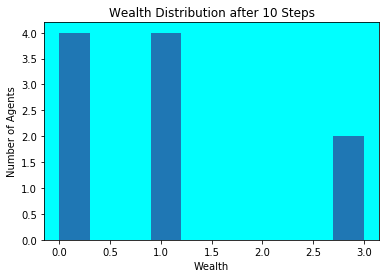

In [13]:

import matplotlib.pyplot as plt
%matplotlib inline

model = MoneyModel(N=10)
for i in range(10):
    model.step()
    
agent_wealth = [a.wealth for a in model.schedule.agents]
plt.hist(x=agent_wealth)
plt.title(label='Wealth Distribution after 10 Steps')
plt.xlabel(xlabel='Wealth')
plt.ylabel(ylabel='Number of Agents')
ax = plt.gca()
ax.set_facecolor(color='cyan')
plt.show()


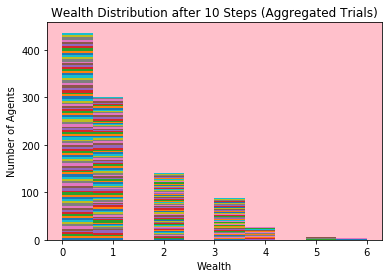

In [6]:

import matplotlib.pyplot as plt
%matplotlib inline

# running multiple MoneyModels
all_wealth = []
for j in range(100):
    # Running individual models sequencially
    model = MoneyModel(N=10)
    for i in range(10):
        model.step()
    
    # keeping track of results for each model
    all_wealth.append([agent.wealth for agent in model.schedule.agents])

plt.hist(x=all_wealth, histtype='barstacked')
plt.title(label='Wealth Distribution after 10 Steps (Aggregated Trials)')
plt.xlabel(xlabel='Wealth')
plt.ylabel(ylabel='Number of Agents')
ax = plt.gca()
ax.set_facecolor(color='pink')
plt.show()


# Grid

There are two (2) types of grids holding fundamental units called cells. In <i>SingleGrid</i>, each cell may hold only one agent at most. In <i>MultuGrid</i>, each cell may hold muliple agents. For any grid, there is always the parameter <i>torus</i>, which enables an agent to wrap around to the other side if it veers off bounds of the grid.

In [10]:

from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

class MoneyAgent(Agent):
    """An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id=unique_id, model=model)
        self.wealth = 1
        
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False
        )
        new_position = self.random.choice(self, new_position)
        self.model.grid.move_agent(agent=self, pos=new_position)

    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1
    
     def step(self):
        self.move()
        if self.wealth > 0:
            self.give_money()
    
class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width=width, height=height, torus=True)
        self.schedule = RandomActivation(self)
        
        # generating agents
        for i in range(10):
            agent = MoneyAgent(unique_id=i, model=self)
            self.schedule.add(agent=agent)
            
            # add agent to random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(agent=agent, pos=(x, y))
            

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 27)

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

model = MoneyModel(50, 10, 10)
for i in range(20):
    model.step()

agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()
plt.show()
